In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [125]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [76]:
df.shape

(1338, 75)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [126]:
df.drop(columns={'MiscFeature','Fence','PoolQC','Alley','MasVnrType','FireplaceQu'},inplace=True)

In [127]:
df.isnull().sum().sort_values(ascending=False).head(16)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
Electrical        1
WoodDeckSF        0
PavedDrive        0
LowQualFinSF      0
dtype: int64

In [128]:
df=df.dropna(subset=['BsmtExposure','MasVnrArea','Electrical','BsmtFinType2'])

In [129]:
df = df.dropna(subset=['GarageYrBlt'])

In [130]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

DROPING COLUMNS WHICH ARE LESS RELATED

In [131]:
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=True)

EnclosedPorch   -0.127385
KitchenAbvGr    -0.111408
OverallCond     -0.108627
MSSubClass      -0.079599
BsmtFinSF2      -0.031226
Id              -0.030473
BsmtHalfBath    -0.030175
YrSold          -0.020451
MiscVal         -0.016990
LowQualFinSF    -0.009992
MoSold           0.041310
3SsnPorch        0.042159
PoolArea         0.091881
ScreenPorch      0.096624
BedroomAbvGr     0.169266
BsmtUnfSF        0.191689
BsmtFullBath     0.209695
LotFrontage      0.212075
LotArea          0.254757
HalfBath         0.258175
WoodDeckSF       0.305983
2ndFlrSF         0.311354
OpenPorchSF      0.322786
BsmtFinSF1       0.359677
Fireplaces       0.445434
MasVnrArea       0.465811
GarageYrBlt      0.481730
YearRemodAdd     0.501435
YearBuilt        0.504297
TotRmsAbvGrd     0.551821
FullBath         0.569313
TotalBsmtSF      0.602042
1stFlrSF         0.604714
GarageArea       0.607535
GarageCars       0.640154
GrLivArea        0.711706
OverallQual      0.783546
SalePrice        1.000000
Name: SalePr

In [132]:

df=df.drop(columns={'3SsnPorch','MoSold','LowQualFinSF','MiscVal','YrSold','BsmtHalfBath','Id','BsmtFinSF2'}) 


OUTLIER DETECTION 

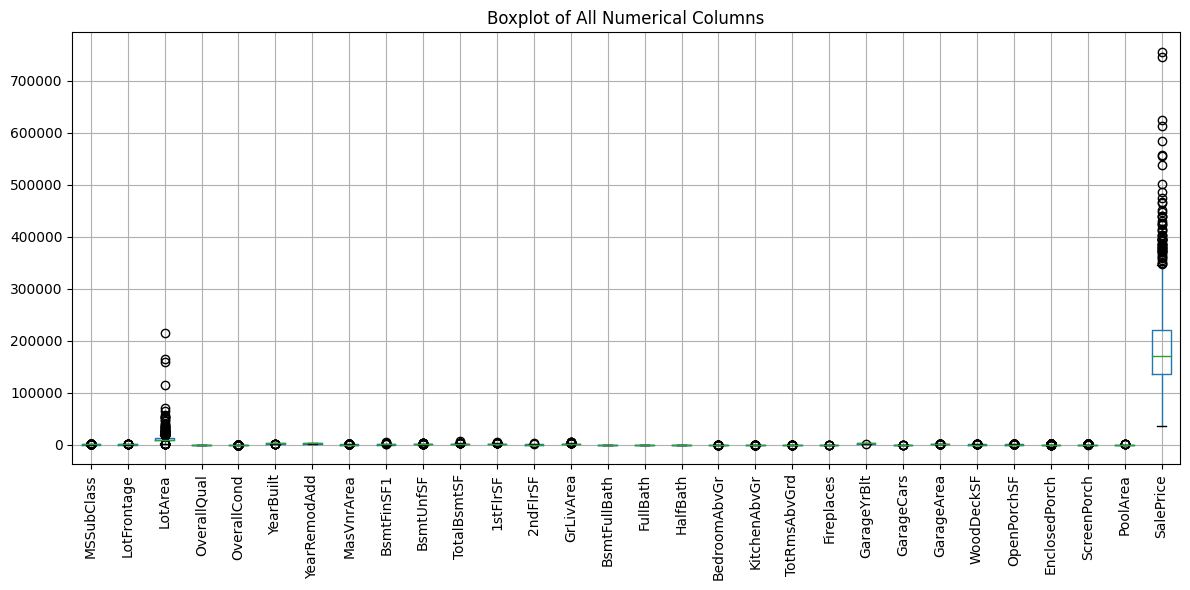

In [57]:
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')

# Plot boxplot
plt.figure(figsize=(12, 6))
numeric_df.boxplot(rot=90)
plt.title("Boxplot of All Numerical Columns")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
df['LotArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


<Axes: >

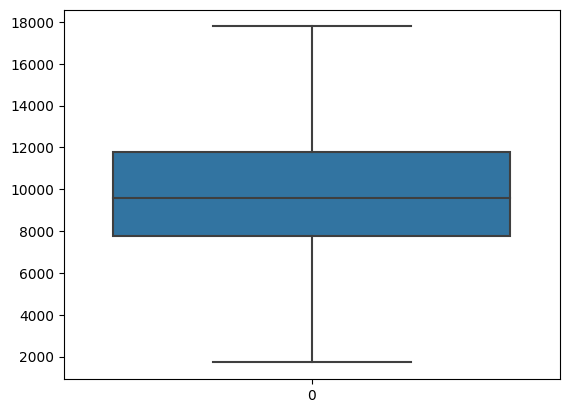

In [92]:
import seaborn as sns
sns.boxplot(df['LotArea'])

<Axes: >

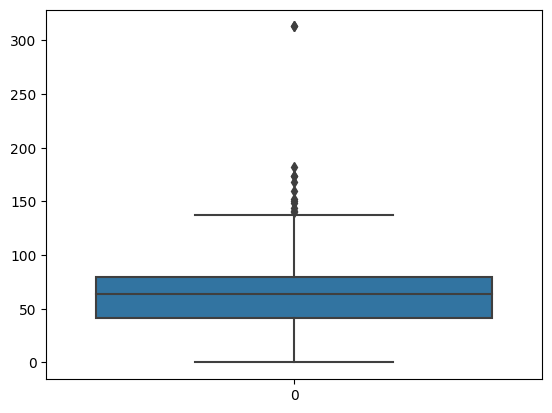

In [83]:
sns.boxplot(df['LotFrontage'])

<Axes: >

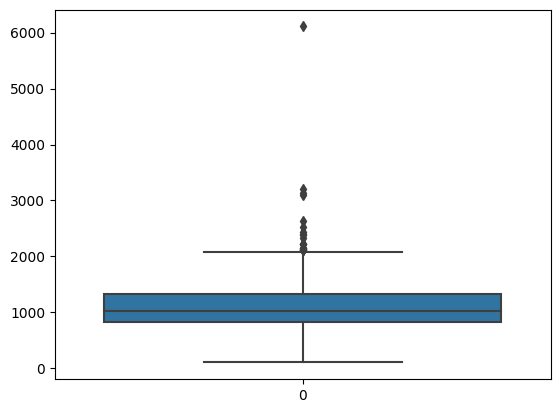

In [84]:
sns.boxplot(df['TotalBsmtSF'])

HERE WE ARE NOT REMOVING OUTLIERS SINCE THE SALEPRICE COLUMN IS ALSO CONTAINING OUTLIERS A LOT AND THE DATA IS DEPENDING ON THE OUTLIERS OF THE COLUMNS 
IF WE TRY TO REMOVE THEM THEN THE ACCURACY IS DECREASING A LOT

In [121]:
# Outliers={'LotFrontage','TotalBsmtSF'}

# for col in Outliers:
    
#     Q1=df[col].quantile(0.25)
#     Q3=df[col].quantile(0.75)
#     IQR=Q3-Q1
    
#     l=Q1-1.5*IQR
#     u=Q3+1.5*IQR
    
#     df.loc[df[col]<l,col]=l
#     df.loc[df[col]>u,col]=u


In [133]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols.shape


(37,)

COUNT ENCODING SINCE ONE HOT ENCODING RESULTS IN MANY ADDITIONAL COLUMNS


In [134]:
for col in categorical_cols:
    
    df[col] = df[col].map(df[col].value_counts())

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Columns: 218 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(188), float64(5), int64(25)
memory usage: 602.0 KB


In [31]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns={'SalePrice'}),df['SalePrice'],test_size=0.1)

In [138]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [136]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)


LinearRegression()

In [137]:
from sklearn.metrics import r2_score
y_pred=model2.predict(X_test)
r2_score(y_pred,y_test)

0.923137018736472

GOT 92% OF ACCURACY

NOW LETS PERFORM ON BY COMBINIG BOTH TRAIN,TEST DATA AND FILL TEST SALEPRICE

In [229]:
df_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [242]:
data=pd.concat([df_train,df_test],ignore_index=True)

In [243]:
data.drop(columns={'MiscFeature','Fence','PoolQC','Alley','MasVnrType','FireplaceQu','YrSold','MoSold','MiscVal','3SsnPorch','BsmtHalfBath','LowQualFinSF','BsmtFinSF2','Id'},inplace=True)

In [244]:
data['LotFrontage']=data['LotFrontage'].fillna(0)

In [245]:
data = data.dropna(subset=['GarageYrBlt'])

In [246]:
data=data.dropna(subset=['BsmtExposure','MasVnrArea','BsmtCond','Utilities','KitchenQual','Functional','MSZoning','SaleType','BsmtQual','BsmtFinType2','Electrical'])

In [247]:
data.isnull().sum().sort_values(ascending=False)

SalePrice       1320
Fireplaces         0
HeatingQC          0
CentralAir         0
Electrical         0
                ... 
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtUnfSF          0
Length: 67, dtype: int64

In [248]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [254]:
train=data[data['SalePrice'].notnull()]
test=data[data["SalePrice"].isnull()]

In [251]:
test.isnull().sum().sort_values(ascending=False).head(10)

SalePrice            1320
BsmtQual_Gd             0
ExterQual_Gd            0
ExterQual_TA            0
ExterCond_Fa            0
ExterCond_Gd            0
ExterCond_Po            0
ExterCond_TA            0
Foundation_CBlock       0
Foundation_PConc        0
dtype: int64

In [255]:
test=test.drop(columns={'SalePrice'})

In [256]:
linearregressor=LinearRegression()
linearregressor.fit(np.array(train.drop(columns={"SalePrice"})),np.array(train['SalePrice']))
test['SalePrice']=linearregressor.predict(np.array(test))

In [258]:
test.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,270.0,...,False,False,False,True,False,False,False,True,False,111983.418325
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,406.0,...,False,False,False,True,False,False,False,True,False,162216.226023
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,137.0,...,False,False,False,True,False,False,False,True,False,188283.725719
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,324.0,...,False,False,False,True,False,False,False,True,False,200517.795759
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,1017.0,...,False,False,False,True,False,False,False,True,False,200822.587792
1465,60,75.0,10000,6,5,1993,1994,0.0,0.0,763.0,...,False,False,False,True,False,False,False,True,False,172023.256211
1466,20,0.0,7980,6,7,1992,2007,0.0,935.0,233.0,...,False,False,False,True,False,False,False,True,False,178255.988953
1467,60,63.0,8402,6,5,1998,1998,0.0,0.0,789.0,...,False,False,False,True,False,False,False,True,False,158683.713118
1468,20,85.0,10176,7,5,1990,1990,0.0,637.0,663.0,...,False,False,False,True,False,False,False,True,False,203996.264643
1469,20,70.0,8400,4,5,1970,1970,0.0,804.0,0.0,...,False,False,False,True,False,False,False,True,False,112867.932819
